<a href="https://colab.research.google.com/github/ivandquevedoc/Guia3ProgCienciaDatos/blob/main/Programaci%C3%B3n_para_la_Ciencia_de_Datos_Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

### Grupo 14
### Giovanny Castillo Castillo gcastil58420
### Ivan Dario Quevedo Contreras iqueved26072

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [ ]:
# Solución propuesta

import pandas as pd
import io

df = pd.read_csv('accidents-1.csv', sep=';')

# Mostrar el porcentaje de valores nulos por columna
missing_values = (df.isnull().sum() / len(df)) * 100
print(missing_values[missing_values > 0])  # Mostrar solo columnas con valores nulos


# Imputar ZIP CODE con la moda dentro de cada BOROUGH
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Imputar LATITUDE y LONGITUDE con la media dentro de cada BOROUGH
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

# Rellenar ON STREET NAME con "UNKNOWN"
df['ON STREET NAME'].fillna("UNKNOWN", inplace=True)

# Reemplazar valores nulos en CONTRIBUTING FACTOR VEHICLE X con "Unspecified"
factor_cols = [col for col in df.columns if 'CONTRIBUTING FACTOR VEHICLE' in col]
df[factor_cols] = df[factor_cols].fillna("Unspecified")

# Reemplazar valores nulos en VEHICLE TYPE CODE X con "Unknown"
vehicle_cols = [col for col in df.columns if 'VEHICLE TYPE CODE' in col]
df[vehicle_cols] = df[vehicle_cols].fillna("Unknown")

# Verificar que ya no haya valores nulos
print(df.isnull().sum())




ZIP CODE                          0.029347
LATITUDE                          2.925516
LONGITUDE                         2.925516
ON STREET NAME                   35.470103
CONTRIBUTING FACTOR VEHICLE 1     0.370616
CONTRIBUTING FACTOR VEHICLE 2    16.773296
CONTRIBUTING FACTOR VEHICLE 3    94.519583
CONTRIBUTING FACTOR VEHICLE 4    98.802626
CONTRIBUTING FACTOR VEHICLE 5    99.667955
VEHICLE TYPE CODE 1               0.721527
VEHICLE TYPE CODE 2              23.306026
VEHICLE TYPE CODE 3              94.842824
VEHICLE TYPE CODE 4              98.861321
VEHICLE TYPE CODE 5              99.684306
dtype: float64


<ipython-input-11-3bdf157f41c1>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ON STREET NAME'].fillna("UNKNOWN", inplace=True)


DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [ ] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


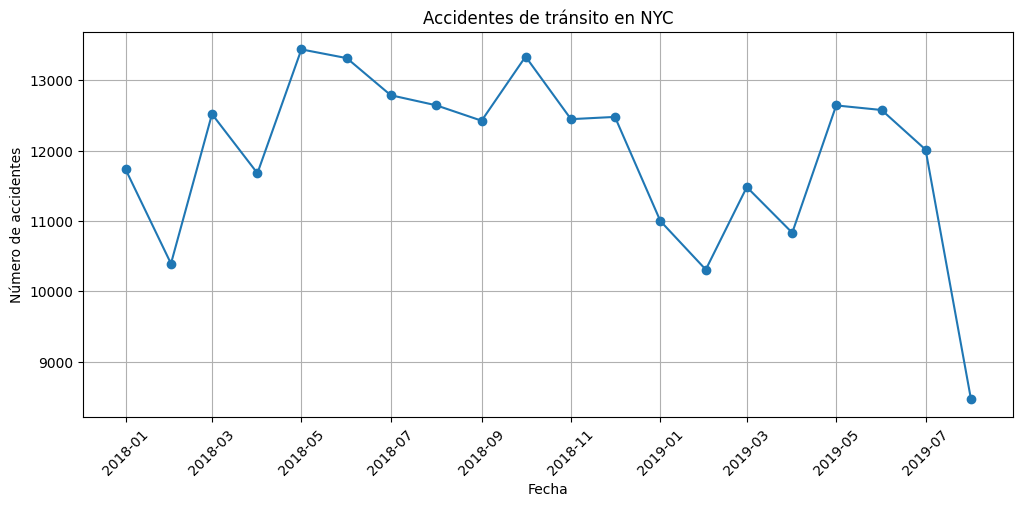

In [ ]:
# Solución propuesta
import matplotlib.pyplot as plt

# Convertir la columna DATE a tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Crear una nueva columna de período mensual
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')

# Contar el número de accidentes por mes
monthly_accidents = df.groupby('YEAR_MONTH').size()

# Convertir el índice a formato datetime para graficar correctamente
monthly_accidents.index = monthly_accidents.index.to_timestamp()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 5))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', linestyle='-')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Número de accidentes')
plt.title('Accidentes de tránsito en NYC')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()



El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

Los meses quereportan menos accidentes de transito son Enero y Febrero, podrain ser por motivos de razones demograicas y festividades como por ejemplo vacaciones de inicio de año, celebracion religiosas etc

### Ejercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

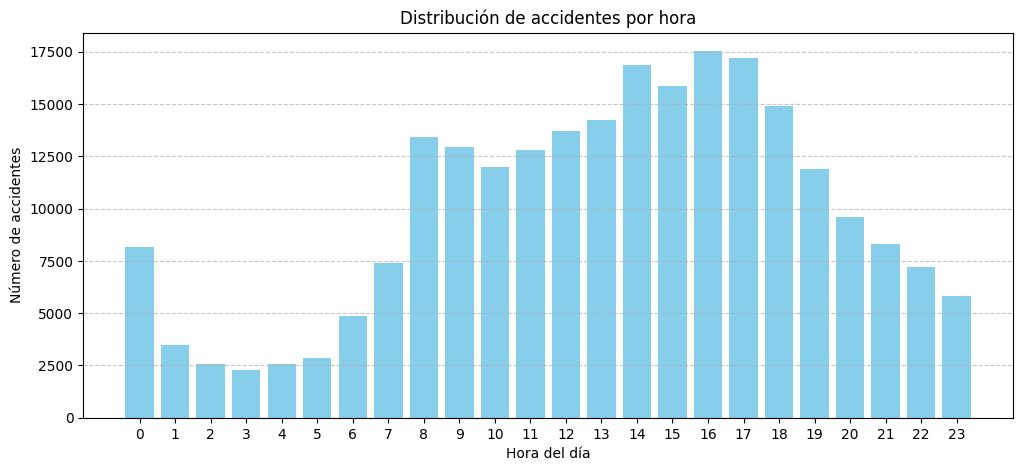

In [ ]:
# Solución propuesta

# columna TIME a formato datetime
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M')

# Extraer la hora en una nueva columna
df['HOUR'] = df['TIME'].dt.hour

# Contar el número de accidentes por cada hora del día
hourly_accidents = df['HOUR'].value_counts().sort_index()


plt.figure(figsize=(12, 5))
plt.bar(hourly_accidents.index, hourly_accidents.values, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Distribución de accidentes por hora')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

RTA: Al no teneren cuenta la fecha y el lugar no es posible determinar las condiciones especificas de las localizaciones en las cuales ocurren un determinado numero de accidentes, por ejemplo, si es un sector comercial o de oficinas se podria indicar que en las horas pico es mas probable un aumento de accidentes debido a una mayor cantidad de actores viales interactuando,

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

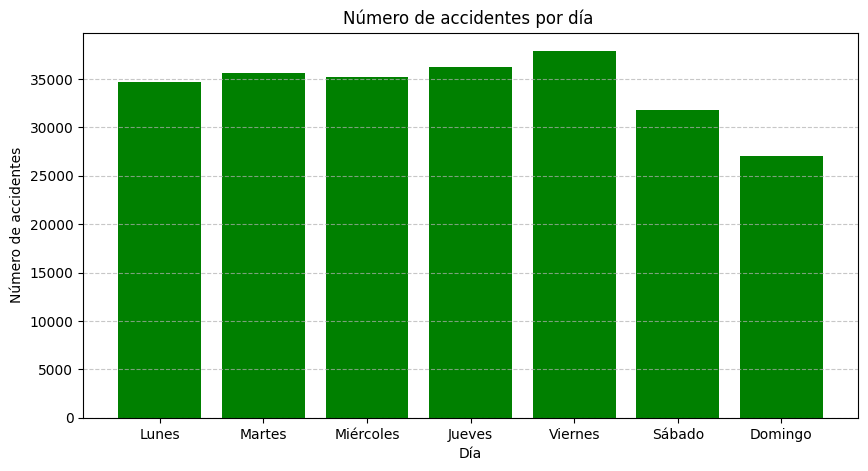

In [ ]:
# Solución



# Extraer el día de la semana (0 = lunes, 6 = domingo)
df['WEEKDAY'] = df['DATE'].dt.weekday


weekday_accidents = df['WEEKDAY'].value_counts().sort_index()

weekday_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
weekday_accidents.index = [weekday_names[i] for i in weekday_accidents.index]

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.bar(weekday_accidents.index, weekday_accidents.values, color='green')

# Configurar etiquetas y título
plt.xlabel('Día')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por día ')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

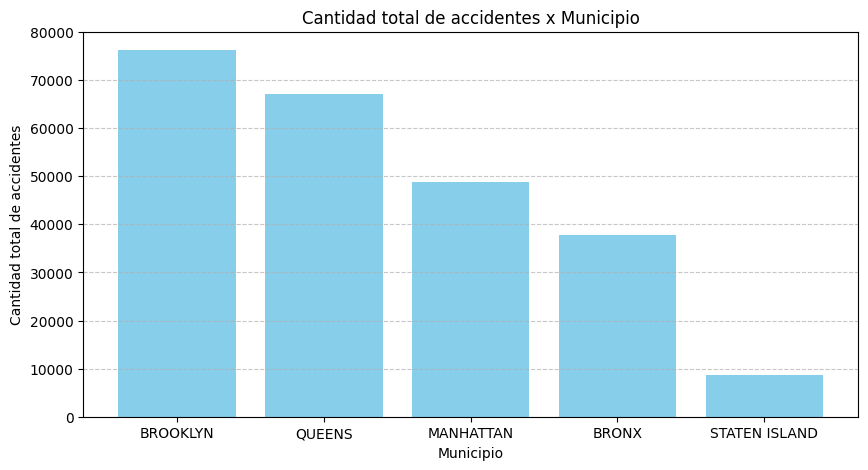

BRONX             897.833333
BROOKLYN         1077.019774
MANHATTAN        2147.533040
QUEENS            617.479301
STATEN ISLAND     148.564103
dtype: float64


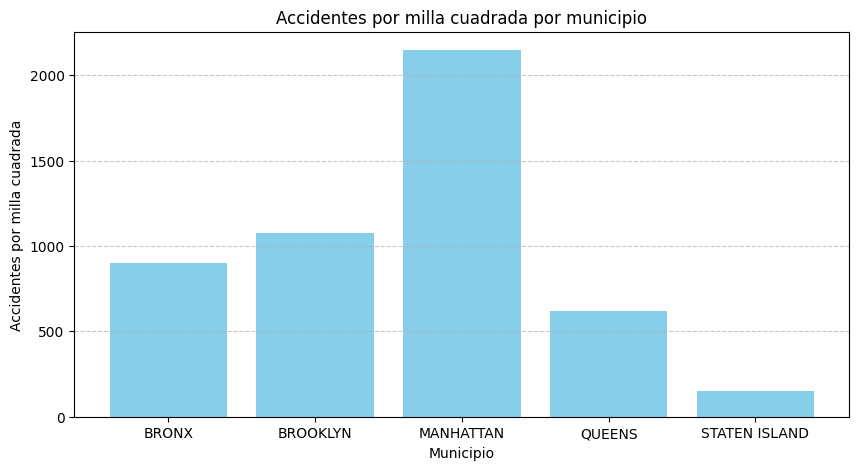

In [ ]:
# Solución propuesta

# Por cada municipio se calcula el número de accidentes
accidents_by_borough = df["BOROUGH"].value_counts()

# Grafica de total de accidentes por munipio
plt.figure(figsize=(10, 5))
plt.bar(accidents_by_borough.index, accidents_by_borough, color='skyblue')
plt.xlabel("Municipio")
plt.ylabel("Cantidad total de accidentes")
plt.title("Cantidad total de accidentes x Municipio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Se arma un dic de area por municipio en millas cuadradas
area_by_borough = {
    "BRONX": 42.0,
    "BROOKLYN": 70.8,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 58.5
}

# Se calcula la densidad de accidentes de cada municipio por milla cuadrada del mismo
density_by_area = accidents_by_borough / pd.Series(area_by_borough)
print(density_by_area)

# Grafica de accidentes por milla cuadrada x municipio
plt.figure(figsize=(10, 5))
plt.bar(density_by_area.index, density_by_area, color='skyblue')
plt.xlabel("Municipio")
plt.ylabel("Accidentes por milla cuadrada")
plt.title("Accidentes por milla cuadrada por municipio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

Rta/ BROOKLYN, en la primera gráfica tiene más accidentes totales que los demás, pero MANHATTAN, al ser más pequeño que todos, el valor de la densidad lo posiciona como primera bajo dicho criterio (segunda gráfica).  

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

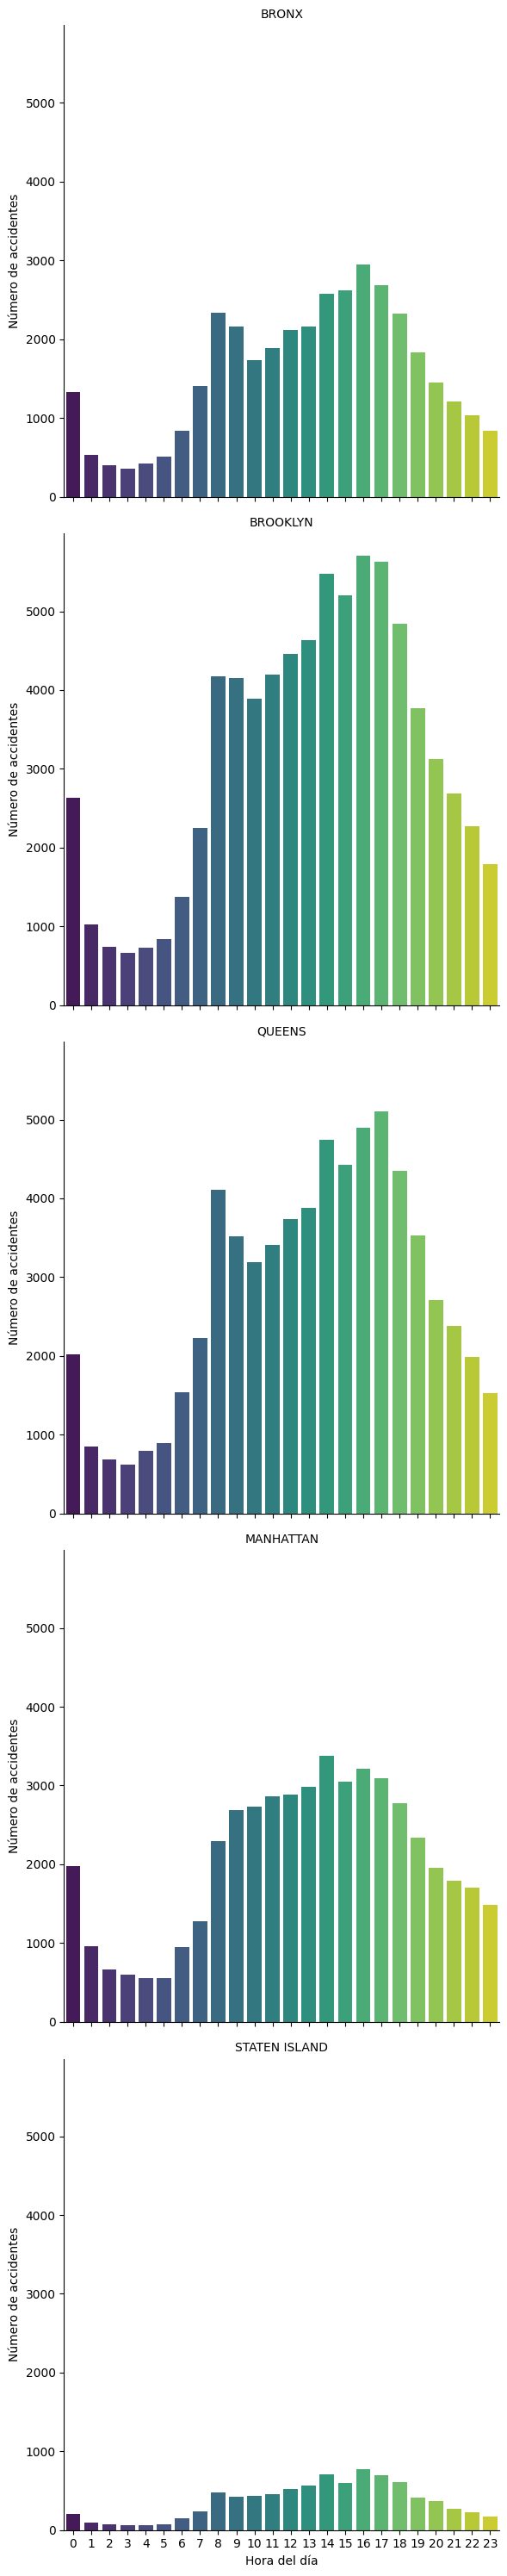

In [ ]:
# Solución propuesta

import seaborn as sns


# Crear una cuadrícula de gráficos de barras por municipio
g = sns.FacetGrid(df, col="BOROUGH", col_wrap=1, height=6, sharex=True, sharey=True)
g.map(sns.countplot, 'HOUR', order=range(24), palette='viridis')

# Configurar etiquetas y títulos
g.set_axis_labels('Hora del día', 'Número de accidentes')
g.set_titles('{col_name}')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

RTA:  el numero de accidentes por cada municpio varia, no obstante claramente en las graficas se evidencia una tendencia en las cuales se presentan una mayor accidentabilidad generarlmente entre las 13 y 18 horas

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

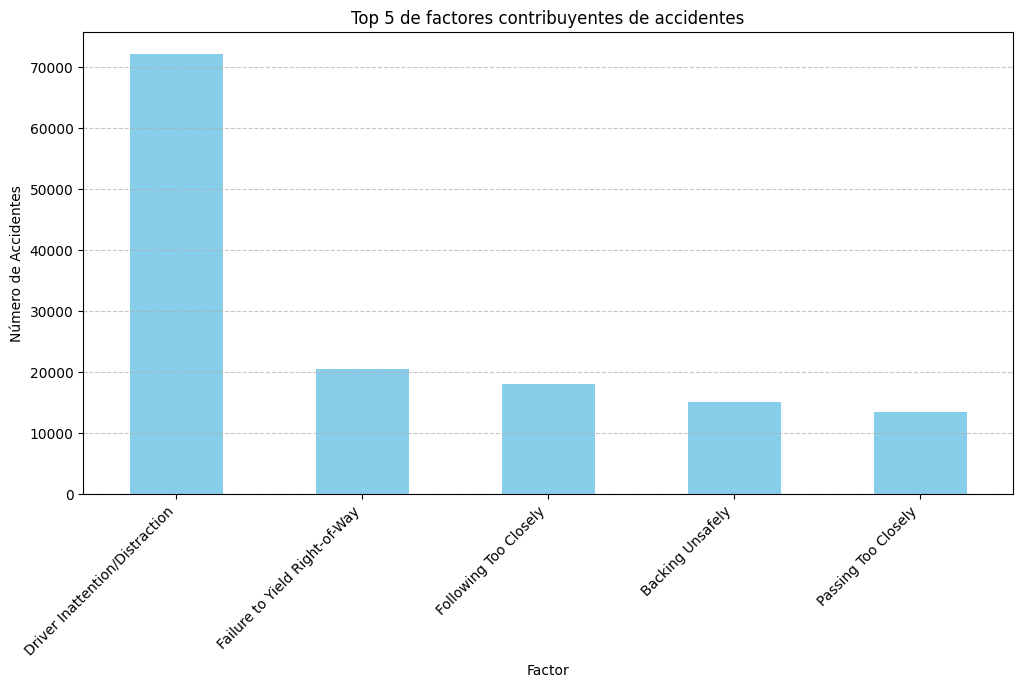

In [26]:
# Solución propuesta

# Creamos una serie concatenando las columnas de factores
serie_de_factores = pd.concat([df[col] for col in factor_cols], ignore_index=True)

# Se retiran los factores no especificados
serie_de_factores = serie_de_factores[serie_de_factores != "Unspecified"]

# Por cada factor se realiza el conteo de ocurrencias
factor_counts = serie_de_factores.value_counts()

# Graficar los factores más comunes
plt.figure(figsize=(12, 6))
factor_counts.head(5).plot(kind="bar", color='skyblue')
plt.xlabel("Factor")
plt.ylabel("Número de Accidentes")
plt.title("Top 5 de factores contribuyentes de accidentes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El factor más común y por mucho, como causante de la generación de accidentes en la desatención o distracción de alguno de los involucrados; por lo tanto al menos alguno de los involucrados tenía su foco o punto de vista o atención en una zona diferente al volante o a su recorrido, si fue un transeúnte. Por lo tanto es necesario implantar campañas de prestación, concentración y disposición total de las habilidades físicas y motoras durante el ejercicio de conducción o tránsito por las vías.

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

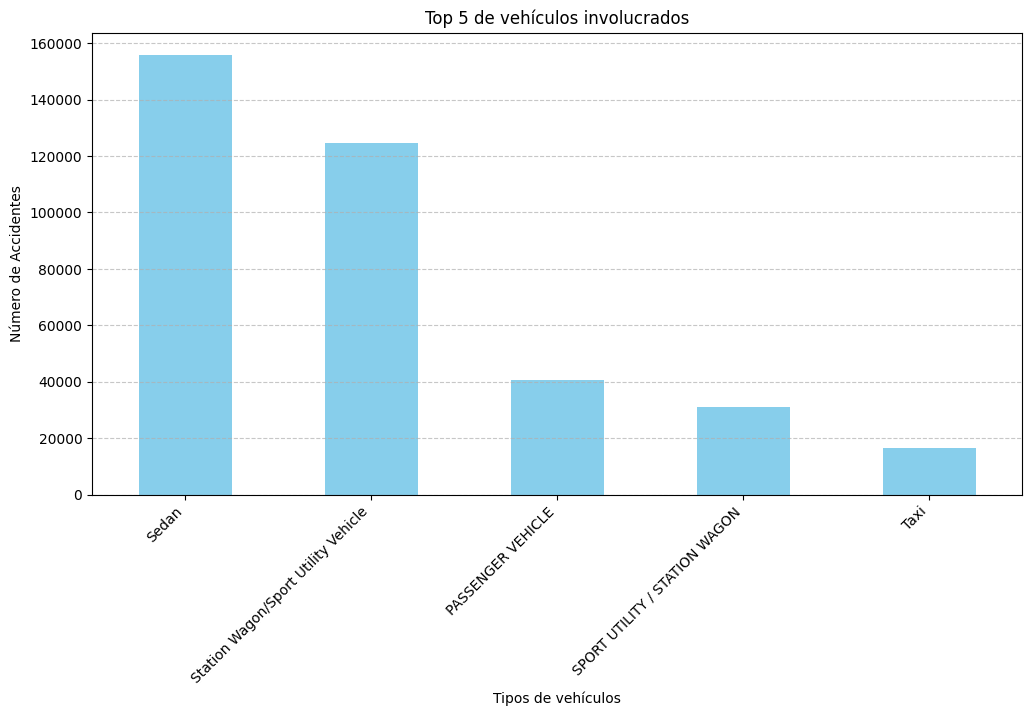

In [27]:
# Solución propuesta

# Creamos una serie concatenando las columnas de vehículos
serie_de_vehiculos = pd.concat([df[col] for col in vehicle_cols], ignore_index=True)

# Se retiran los vehículos no identificados
serie_de_vehiculos = serie_de_vehiculos[serie_de_vehiculos != "Unknown"]

# Por cada tipo de vehículo se realiza el conteo de ocurrencias
vehiculos_counts = serie_de_vehiculos.value_counts()

# Graficar los 5 vehículos más involucrados en accidentes
plt.figure(figsize=(12, 6))
vehiculos_counts.head(5).plot(kind="bar", color='skyblue')
plt.xlabel("Tipos de vehículos")
plt.ylabel("Número de Accidentes")
plt.title("Top 5 de vehículos involucrados")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

De lejos los tipos de vehículos **Sedan** y **Station Wagon/Sport Utility Vehicle** son los más involucrados en accidentes; no se tiene información adicional para conocer el motivo puntual, pero se puede inferir que poblacionalmente son los tipos de vehículo más comprados/vendidos en la ciudad. Se necesitará un estudio diferente que evaluara las capacidades tecnológicas de los tipos de vehículo que puedan recomendarse e incluirse para ayudar a evitar siniestros.

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [X] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [ ]:
# Solución propuesta

# Filtrar datos del primer trimestre de 2019
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
T1_2019 = df[(df['DATE'].dt.year == 2019) & (df['DATE'].dt.month.isin([1, 2, 3]))]


# Filtrar  accidentes donde hubo peatones o ciclistas heridos o muertos
df_2019_ped_cyc = T1_2019[
    (T1_2019['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (T1_2019['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (T1_2019['NUMBER OF CYCLIST INJURED'] > 0) |
    (T1_2019['NUMBER OF CYCLIST KILLED'] > 0)
]

# Contar los factores que más contribuyeron a estos accidentes
factor_cols = [col for col in df_2019_ped_cyc.columns if 'CONTRIBUTING FACTOR VEHICLE' in col]
top_factors = df_2019_ped_cyc[factor_cols].stack().value_counts().head(10)
print(top_factors)


# Filtrar el primer trimestre de 2018
T1_2018 = df[(df['DATE'].dt.year == 2018) & (df['DATE'].dt.month.isin([1, 2, 3]))]

# Filtrar accidentes con peatones/ciclistas heridos o muertos
df_2018_ped_cyc = T1_2018[
    (T1_2018['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (T1_2018['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (T1_2018['NUMBER OF CYCLIST INJURED'] > 0) |
    (T1_2018['NUMBER OF CYCLIST KILLED'] > 0)
]

import folium
from folium.plugins import HeatMap

# Crear un mapa base centrado en NYC
nyc2018 = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
nyc2019 = folium.Map(location=[40.7128, -74.0060], zoom_start=12)


heat_data_2018 = list(zip(df_2018_ped_cyc['LATITUDE'], df_2018_ped_cyc['LONGITUDE']))
HeatMap(heat_data_2018).add_to(nyc2018)
nyc2018






Unspecified                                              10528
Driver Inattention/Distraction                             720
Failure to Yield Right-of-Way                              603
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      139
Backing Unsafely                                            82
View Obstructed/Limited                                     55
Traffic Control Disregarded                                 52
Passing or Lane Usage Improper                              36
Unsafe Speed                                                28
Other Vehicular                                             27
Name: count, dtype: int64


In [ ]:
heat_data_2019 = list(zip(df_2019_ped_cyc['LATITUDE'], df_2019_ped_cyc['LONGITUDE']))
HeatMap(heat_data_2019).add_to(nyc2019)
nyc2019

De acuerdo a los datos del primer trimestre del 2019, se encuentra que los principales factores fueron debidos a "Driver Inattention/Distraction, Failure to Yield Right-of-Way y Pedestrian/Bicyclist/Other Pedestrian Error/Confusion. estos factores estan relacionados a falta de habilidad de manejo y no aplicacion de las nrmas de transito. los mapas de calor representas focos de accidentabilidad comunes, los cuales permitirian establecer planes de accion como control vial y sanciones pedagogicas enfocadas en la aplicacion de conciencia vial y normas de transito.

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

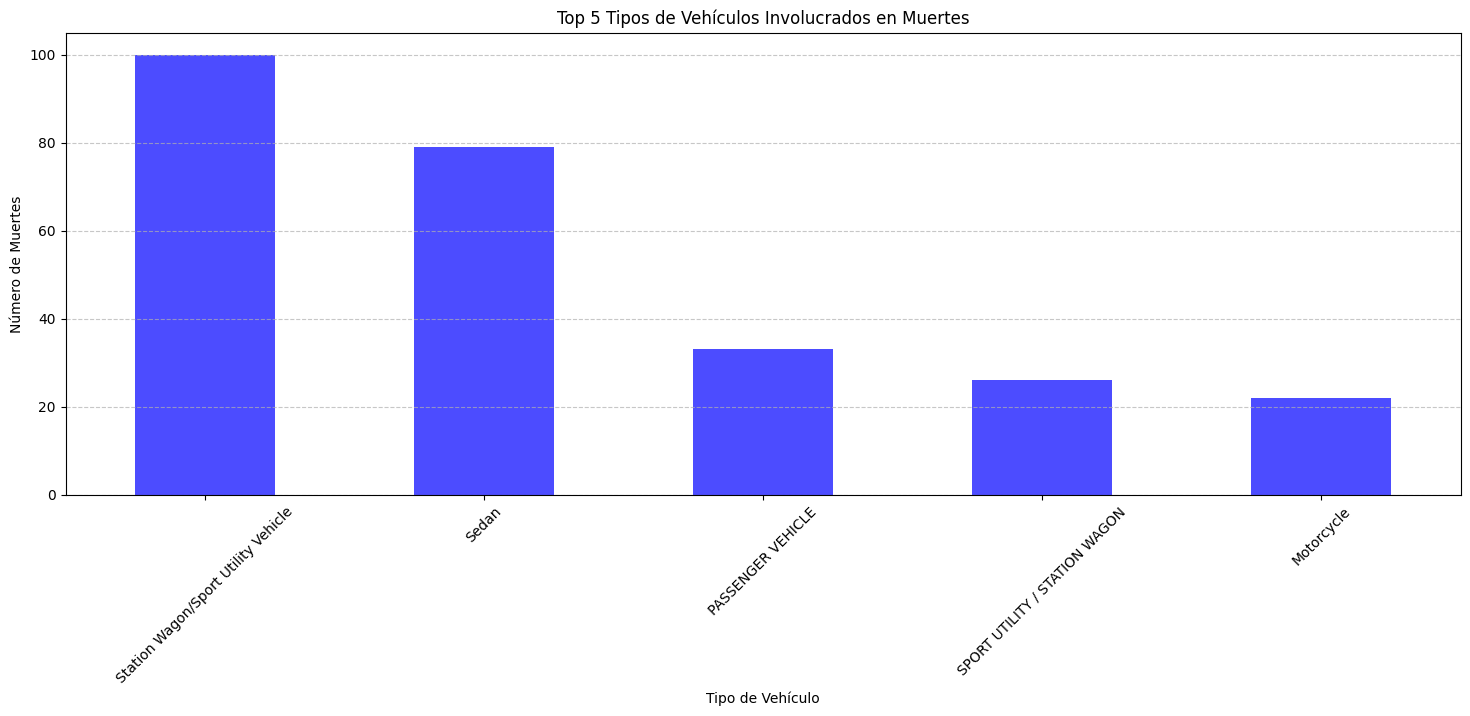

VEHICLE_TYPE
Station Wagon/Sport Utility Vehicle    100
Sedan                                   79
PASSENGER VEHICLE                       33
SPORT UTILITY / STATION WAGON           26
Motorcycle                              22
Name: TOTAL_KILLS, dtype: int64

Suma total de muertes top 5: 260

Porcentaje de muertes por cada tipo:
VEHICLE_TYPE
Station Wagon/Sport Utility Vehicle    38.461538
Sedan                                  30.384615
PASSENGER VEHICLE                      12.692308
SPORT UTILITY / STATION WAGON          10.000000
Motorcycle                              8.461538
Name: TOTAL_KILLS, dtype: float64


In [35]:
# Solución propuesta

# Crear una nueva columna con el total de muertes por accidente
df["TOTAL_KILLS"] = df[
    ["NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST KILLED"]
].sum(axis=1)


vehicle_types = ["VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3",
                   "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]

#Convierte las columnas de tipos de vehículos en una sola columna
df_melted = df.melt(id_vars=["TOTAL_KILLS"], value_vars=vehicle_types, var_name="VEHICLE_NUMBER", value_name="VEHICLE_TYPE")

# Depuramos accidentes sin tipo de vehiculo registrado
df_melted = df_melted[df_melted["VEHICLE_TYPE"] != "Unknown"]

# Agrupar por tipo de vehículo y sumar las muertes
vehicle_death_counts = df_melted.groupby("VEHICLE_TYPE")["TOTAL_KILLS"].sum().sort_values(ascending=False)

# Seleccionar los 5 tipos de vehículos con más muertes
top_5 = vehicle_death_counts.head(5)

# Crear gráfico de barras
plt.figure(figsize=(18,6))
top_5.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Número de Muertes")
plt.title("Top 5 Tipos de Vehículos Involucrados en Muertes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(top_5)
# Suma total de muertes
sum_kills = top_5.sum()
print("\nSuma total de muertes top 5:", sum_kills)
# Porcentaje de muertes por cada tipo
top_5_percentage = (top_5 / sum_kills) * 100
print("\nPorcentaje de muertes por cada tipo:")
print(top_5_percentage)

Los dos primeros tipos de vehículos **Station Wagon/Sport Utility Vehicle** y **Sedan**, están en la misma decena y son los que están más involucrados en decesos. Con mayor diferencia se encuentran los otros tipos de vehículos. Sería bueno tener más información sobre el perfil de propietario común para los dos primeros tipos, conocer la tecnología mecánica y vehicular para ser reforzada, incluída o mejorada en dichos tipos, para cada uno de los proveedores de automotores, es decir las tecnologías de **0 Colisiones** (+sensores 360 y punto ciegos, +cámaras en paneles para el conductor, +alertas de acercamiento y colisión, +frenado automático para colisión inminente).   